# Circuit of Bernstein-Vazirani algorithm using Qiskit

This notebook will teach you how to construct your own circuits for the Bernstein-Vazirani algorithm using Qiskit.

# Install Qiskit

Install Qiskit if you haven't. Here we are not installing the latest version of Qiskit since it has an issue with displaying circuits using matplotlib (fancy circuits) in Colab.

In [ ]:
!pip install qiskit==0.16.1

# Importing Packages

In [ ]:
from qiskit import * # No need to explain why
import matplotlib as mpl # Required to display some fancy circuits

# The circuits

Now, we move on to main part of the notebook. We will be using functions defined on two binary variables as examples here. Recal that, for any $f_s:\{00,01,10,11\} \rightarrow \{ 0,1\}$, such that $f_s(x) = x \cdot s$, the Bernstein-Vazirani algorithm can be used to find the bitstring $s$. There are four possible bitstrings that $s$ can be. We will be building and executing circuits capable of carrying out the Bernstein-Vazirani algorithm in all four cases.


Let $U_f$ be an oracle circuit such that
\begin{equation}
  U_{f_s} |x\rangle |y\rangle |z\rangle = |x\rangle |y\rangle |z \oplus f_s(x)\rangle = |x\rangle |y\rangle |z \oplus x \cdot s \rangle
\end{equation}
Then, the circuit for the Bernstein-Vazirani algorithm is given as

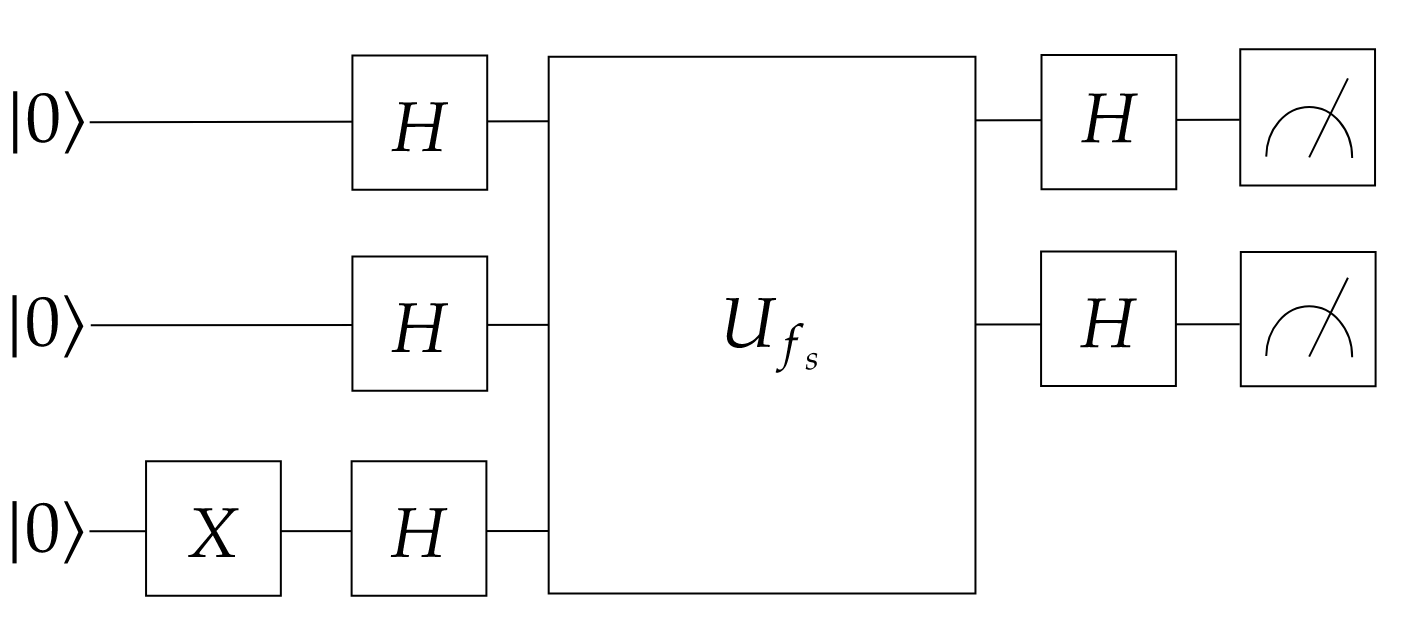

The output string one gets after measuring the first two qubits is the bitstring $s$.

## When $s = 01$

Let $s = 01$. Then $f_{01}:\{00,01,10,11\} \rightarrow \{0,1\}$ is defined as

\begin{equation}
  f_{01}(00) = 0 \\
  f_{01}(01) = 1 \\
  f_{01}(10) = 0 \\
  f_{01}(11) = 1 \\
\end{equation}

The first step is to construct $U_{f_{01}}$. By the definition of $U_{f_{01}}$, one can see that $U_{f_{01}}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_{01}}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_{01}(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_{01}}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_{01}(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_{01}}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_{01}(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_{01}}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_{01}(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_{01}}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_{01}(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_{01}}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_{01}(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_{01}}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_{01}(11)\rangle = |1\rangle|1\rangle|1\rangle\\
  U_{f_{01}}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_{01}(11)\rangle = |1\rangle|1\rangle|0\rangle\\
\end{equation}

This circuit is simply a CNOT gate applied to the second and third qubit. So, for this function, a single CNOT gate is the required oracle $U_{f_{01}}$. Then the final circuit can be seen as

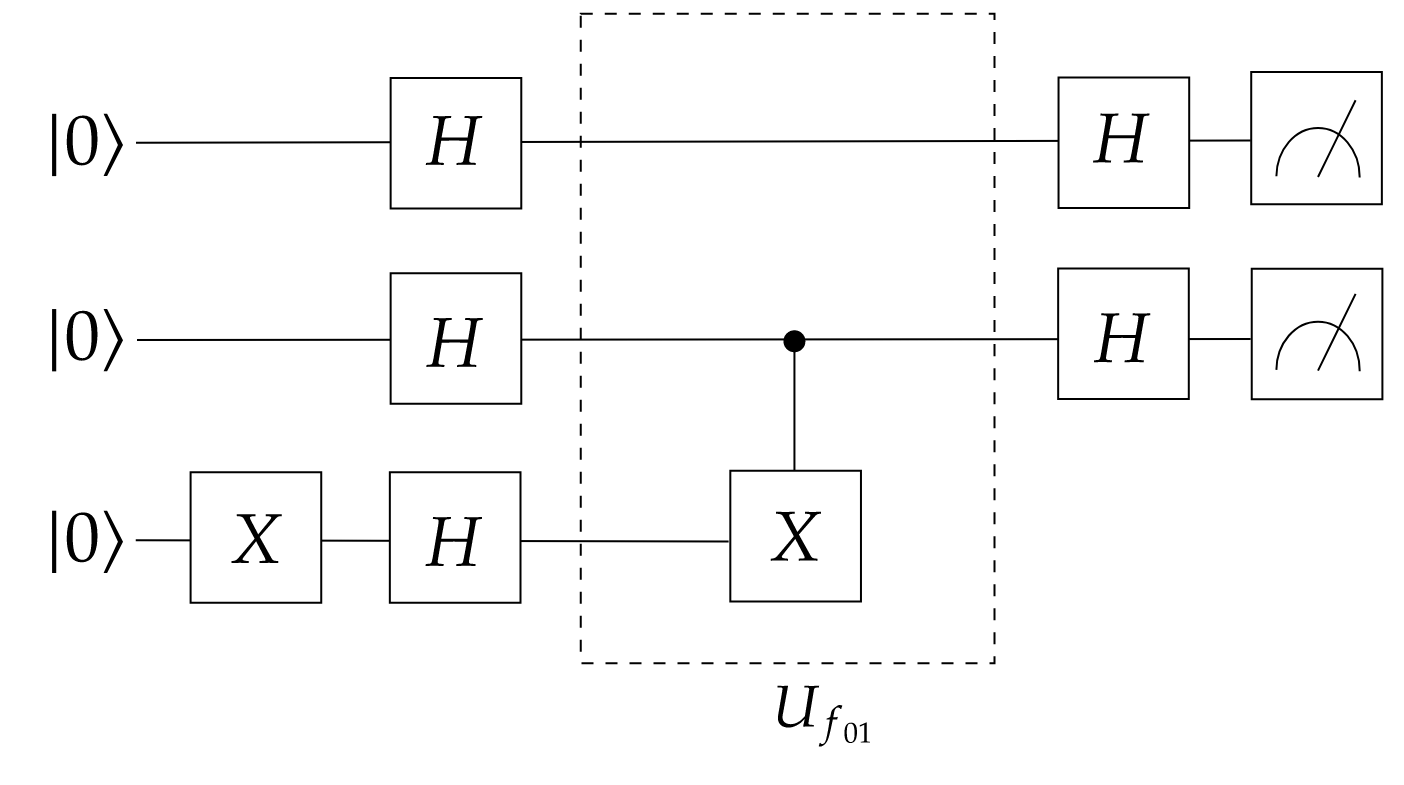


Now, we move on to constructing this circuit using Qiskit

First, we prepare the quantum register. As we can see, from the circuit, the quantum register comprises of 3 qubits. Hence

In [ ]:
# Prepare the quantum register
qr = QuantumRegister(3)

Next, we shall prepare the classical register which will have the classical output after measurement. Since the circuit only requires measuring two qubits, the classical register requires only two bits. So 

In [ ]:
# Prepare the classical register
cr = ClassicalRegister(2)

Combining both the quantum and classical registers, we now define the quantum circuit

In [ ]:
# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

Now, we shall start applying the gates.

First step is to prepare $|-\rangle$ in the third qubit. This is done by applying an $X$ gate followed by a $H$ gate.

In [ ]:
# Apply X gate on qubit 2
qc.x(2)

# Apply Hadamard gate on qubit 2
qc.h(2)


Next we apply $H$ gates on the first and second qubits, then our oracle (CNOT gate), and two more $H$ gates on the first and second qubits.

In [ ]:
# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(1,2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

Now, we shall measure the first qubit and store the result in the prepared classical register. The measurement is done 100 times, that is, the circuit is repeatedly carried out 100 times.

In [ ]:
# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

Measurement result: {'01': 100}


The measurement result is read as {'Output': Number of times output occurred}. The bitstring is read from right to left. As expected, we can see that, the output is always 01.

The circuit that we have just build can be visualized using Qiskit using this code

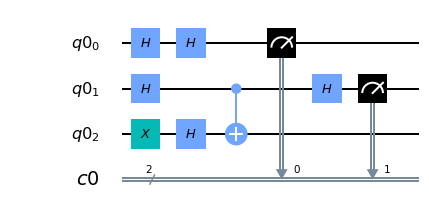

In [ ]:
# Display circuit
qc.draw(output = "mpl")

## When $s = 10$

Let $s = 10$. Then $f_{10}:\{00,01,10,11\} \rightarrow \{0,1\}$ is defined as

\begin{equation}
  f_{10}(00) = 0 \\
  f_{10}(01) = 0 \\
  f_{10}(10) = 1 \\
  f_{10}(11) = 1 \\
\end{equation}

The first step is to construct $U_{f_{10}}$. By the definition of $U_{f_{10}}$, one can see that $U_{f_{10}}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_{10}}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_{10}(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_{10}}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_{10}(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_{10}}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_{10}(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_{10}}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_{10}(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_{10}}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_{10}(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_{10}}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_{10}(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_{10}}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_{10}(11)\rangle = |1\rangle|1\rangle|1\rangle\\
  U_{f_{10}}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_{10}(11)\rangle = |1\rangle|1\rangle|0\rangle\\
\end{equation}

This circuit is simply a CNOT gate applied to the first and third qubit. So, for this function, a single CNOT gate is the required oracle $U_{f_{10}}$. Then the final circuit can be seen as

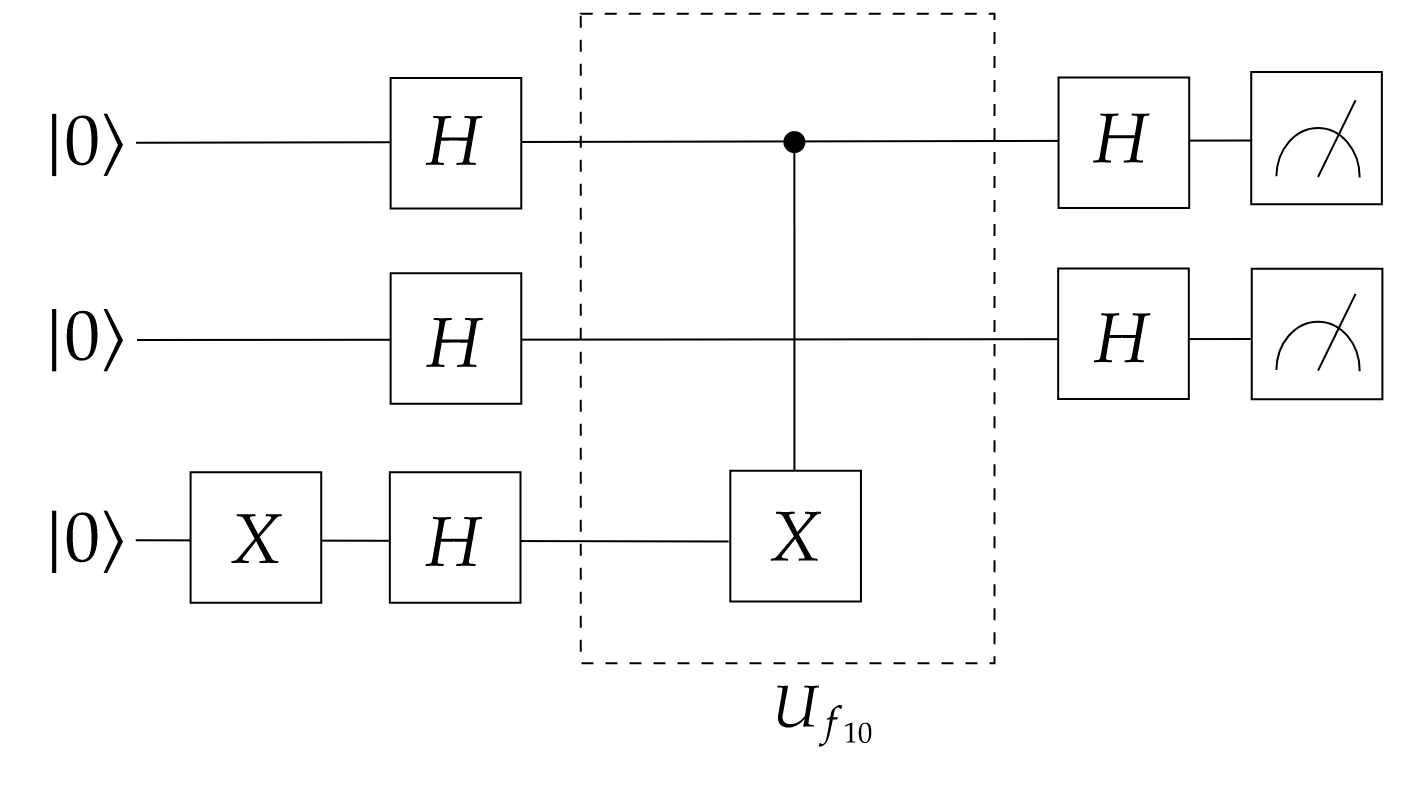

Since constructing and executing $f_{01}$'s circuit was explained in detail, we are not going to explain $f_{10}$'s circuit extensively as it is extremely similar to $f_{01}$'s, except for the oracle part. 

Executing the cell below runs a quantum circuit for the Bernstein-Vazirani algorithm for the function $f_{10}$ 100 times.

Measurement result: {'10': 100}


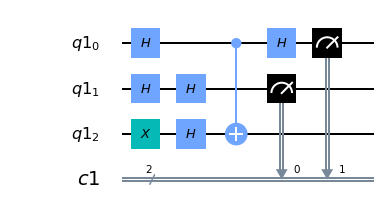

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(0,2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

As expected, we can see that, the output is always 10.

## When $s = 11$

Let $s = 11$. Then $f_{11}:\{00,01,10,11\} \rightarrow \{0,1\}$ is defined as

\begin{equation}
  f_{11}(00) = 0 \\
  f_{11}(01) = 1 \\
  f_{11}(10) = 1 \\
  f_{11}(11) = 0 \\
\end{equation}

The first step is to construct $U_{f_{11}}$. By the definition of $U_{f_{11}}$, one can see that $U_{f_{11}}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_{11}}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_{11}(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_{11}}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_{11}(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_{11}}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_{11}(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_{11}}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_{11}(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_{11}}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_{11}(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_{11}}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_{11}(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_{11}}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_{11}(11)\rangle = |1\rangle|1\rangle|0\rangle\\
  U_{f_{11}}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_{11}(11)\rangle = |1\rangle|1\rangle|1\rangle\\
\end{equation}

This circuit is a CNOT gate applied to the first and third qubit., then another CNOT gate applied to the second and third qubit. So, for this function, two CNOT gates is the required oracle $U_{f_{11}}$. Then the final circuit can be seen as

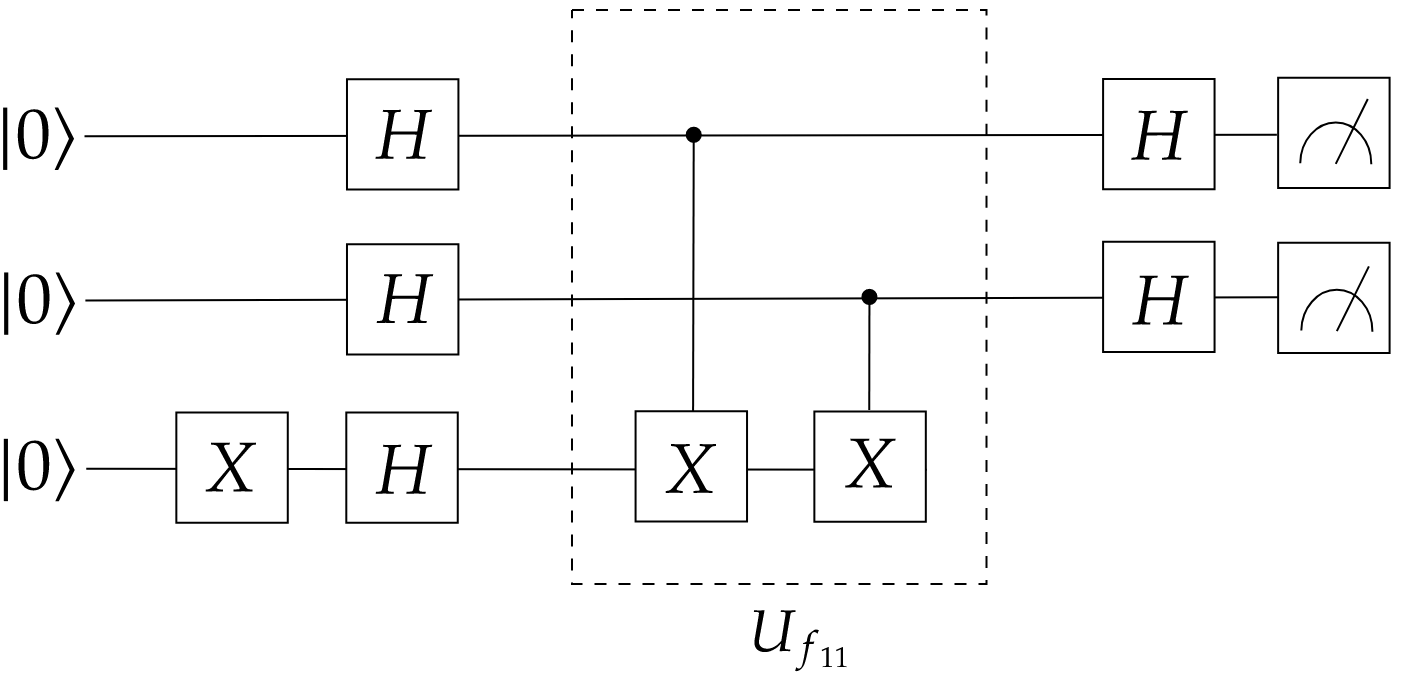

Executing the cell below runs a quantum circuit for the Bernstein-Vazirani algorithm for the function $f_{11}$ 100 times.

Measurement result: {'11': 100}


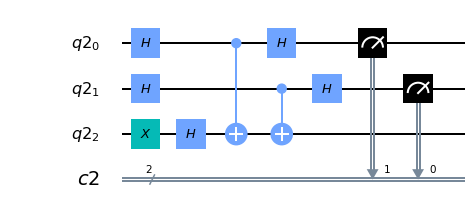

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle
qc.cnot(0,2)
qc.cnot(1,2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

As expected, we can see that, the output is always 11.

## When $s = 00$

Let $s = 00$. Then $f_{00}:\{00,01,10,11\} \rightarrow \{0,1\}$ be defined as

\begin{equation}
  f_{00}(00) = 0 \\
  f_{00}(01) = 0 \\
  f_{00}(10) = 0 \\
  f_{00}(11) = 0 \\
\end{equation}

The first step is to construct $U_{f_{00}}$. By the definition of $U_{f_{00}}$, one can see that $U_{f_{00}}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_{00}}|0\rangle|0\rangle|0\rangle = |0\rangle|0\rangle|0 \oplus f_{00}(00)\rangle = |0\rangle|0\rangle|0\rangle\\
  U_{f_{00}}|0\rangle|0\rangle|1\rangle = |0\rangle|0\rangle|1 \oplus f_{00}(00)\rangle = |0\rangle|0\rangle|1\rangle\\
  U_{f_{00}}|0\rangle|1\rangle|0\rangle = |0\rangle|1\rangle|0 \oplus f_{00}(01)\rangle = |0\rangle|1\rangle|0\rangle\\
  U_{f_{00}}|0\rangle|1\rangle|1\rangle = |0\rangle|1\rangle|1 \oplus f_{00}(01)\rangle = |0\rangle|1\rangle|1\rangle\\
  U_{f_{00}}|1\rangle|0\rangle|0\rangle = |1\rangle|0\rangle|0 \oplus f_{00}(10)\rangle = |1\rangle|0\rangle|0\rangle\\
  U_{f_{00}}|1\rangle|0\rangle|1\rangle = |1\rangle|0\rangle|1 \oplus f_{00}(10)\rangle = |1\rangle|0\rangle|1\rangle\\
  U_{f_{00}}|1\rangle|1\rangle|0\rangle = |1\rangle|1\rangle|0 \oplus f_{00}(11)\rangle = |1\rangle|1\rangle|0\rangle\\
  U_{f_{00}}|1\rangle|1\rangle|1\rangle = |1\rangle|1\rangle|1 \oplus f_{00}(11)\rangle = |1\rangle|1\rangle|1\rangle\\
\end{equation}

This is simply the identity matrix. This means that in this case, from the original circuit for Bernstein-Vazirani algorithm, we can remove the oracle part completely, resulting in the circuit

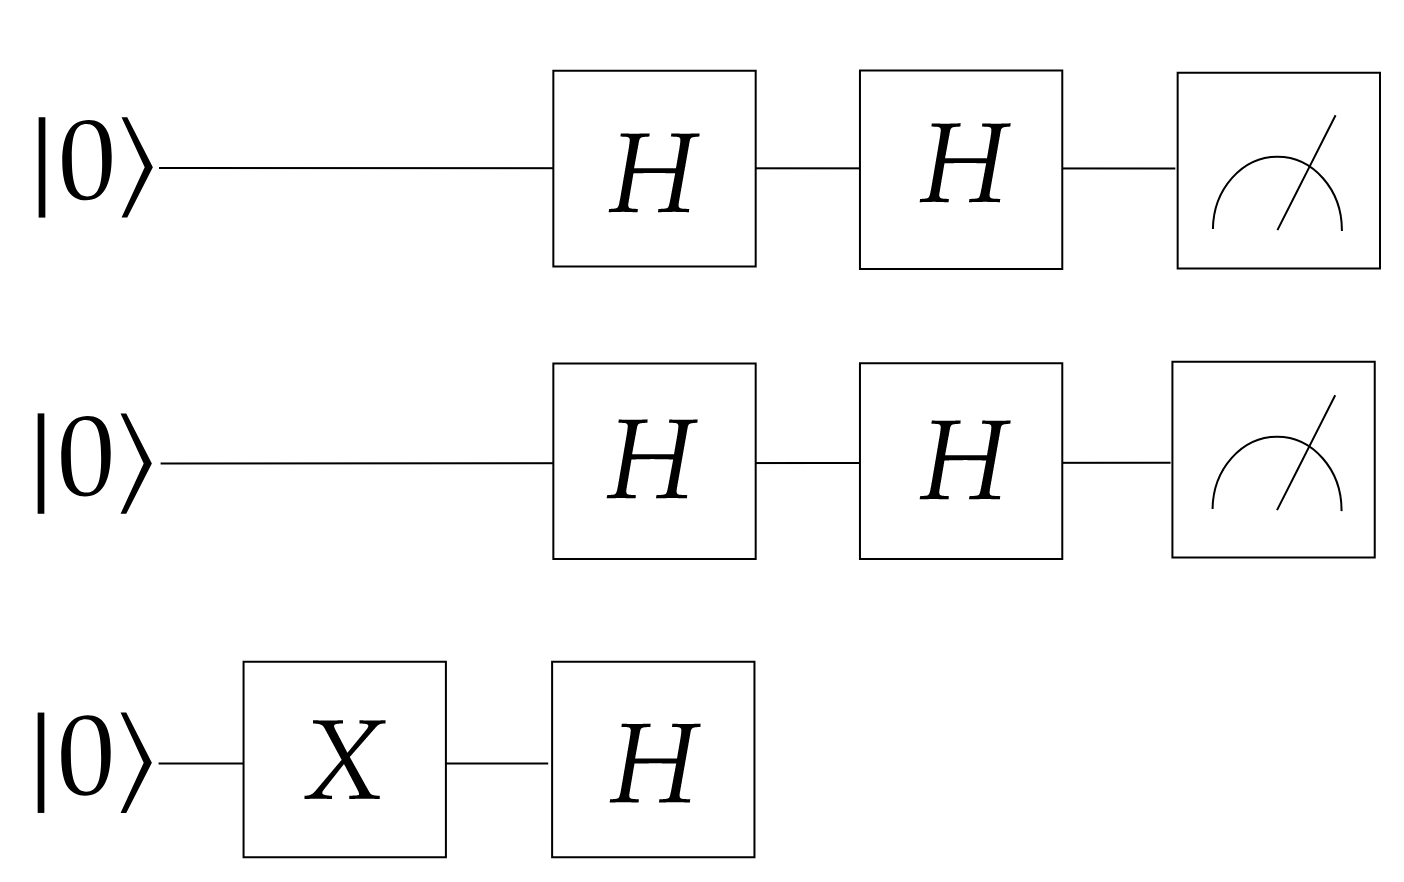

We can clearly see from the circuit why the output of measuring the first and second qubits should be 00. Both the $H$ gates in the first and second registers just cancels out and you are left with $|00\rangle$

Executing the cell below runs a quantum circuit for the Bernstein-Vazirani algorithm for the function $f_{00}$ 100 times.

Measurement result: {'00': 100}


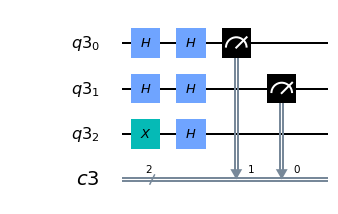

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Prepare '-' state on qubit 2
qc.x(2)
qc.h(2)

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Oracle

# Apply Hadamard gate on qubits 0,1
qc.h(0)
qc.h(1)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

As expected, we can see that, the output is always 00. 